In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ----------------------------
# Load feature-engineered dataset
# ----------------------------
df = pd.read_csv(r"D:\IPO_analysis\data\ipo_features.csv")

# ----------------------------
# Select target column
# ----------------------------
target = "is_listing_win"  # Predict if IPO had positive listing gain

# ----------------------------
# Prepare features and target
# Drop non-numeric / identifier columns
# ----------------------------
X = df.drop([target, "Date", "IPO_Name"], axis=1)
y = df[target]

In [3]:
# ----------------------------
# Impute missing values
# ----------------------------
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# ----------------------------
# Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# ----------------------------
# Scale features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = {}


In [6]:
# ----------------------------
# Train & Evaluate
# ----------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n📊 {name} Results:")
    print("Accuracy:", round(acc*100, 2), "%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



📊 Logistic Regression Results:
Accuracy: 91.15 %
Confusion Matrix:
 [[31  4]
 [ 6 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.95      0.92      0.94        78

    accuracy                           0.91       113
   macro avg       0.89      0.90      0.90       113
weighted avg       0.91      0.91      0.91       113


📊 Random Forest Results:
Accuracy: 100.0 %
Confusion Matrix:
 [[35  0]
 [ 0 78]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        78

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113


📊 Gradient Boosting Results:
Accuracy: 100.0 %
Confusion Matrix:
 [[35  0]
 [ 0 78]]
Classification Report:
               prec

c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:55:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


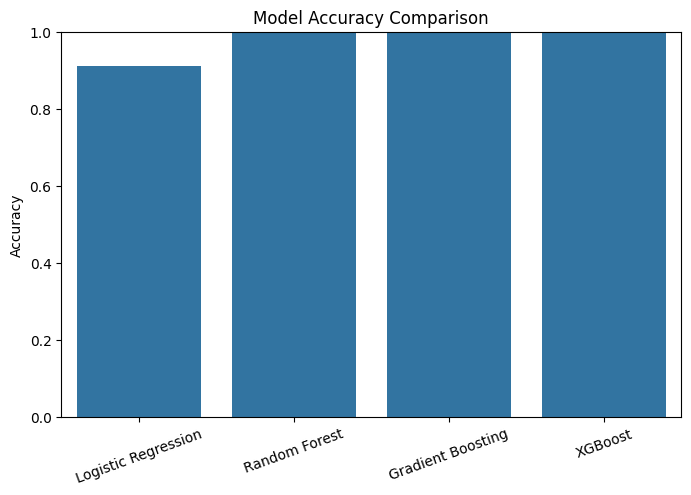

In [7]:
# ----------------------------
# Compare model accuracies
# ----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()